In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
# use GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    print(str(e))

Physical devices cannot be modified after being initialized


In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
def create_complex_cnn():
    model = models.Sequential()

    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.5))

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(10, activation='softmax'))
    return model


model = create_complex_cnn()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,977,162 (7.54 MB)

 Trainable params: 1,973,834 (7.53 MB)

 Non-trainable params: 3,328 (13.00 KB)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 63ms/step - accuracy: 0.2826 - loss: 2.4028 - val_accuracy: 0.1107 - val_loss: 3.5439
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.5107 - loss: 1.3865 - val_accuracy: 0.5653 - val_loss: 1.1964
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.6169 - loss: 1.0794 - val_accuracy: 0.5964 - val_loss: 1.2144
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.6840 - loss: 0.8928 - val_accuracy: 0.7056 - val_loss: 0.8424
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.7316 - loss: 0.7630 - val_accuracy: 0.7031 - val_loss: 0.8734
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.7627 - loss: 0.6875 - val_accuracy: 0.6675 - val_loss: 1.0021
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.7776 - loss: 0.6303 - val_accuracy: 0.7840 - val_loss: 0.6307
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.8020 - loss: 0.5699 - val_

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8605 - loss: 0.4853
Test accuracy: 0.8608999848365784


In [ ]:
def plot_history(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()

plot_history(history)

NameError: name 'history' is not defined

In [ ]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.squeeze(y_test)

In [ ]:
np.argmax(true_classes, axis=1)

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
class_names = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
    ]

def plot_sample_predictions(
    X_test,
    true_classes,
    predicted_classes,
    class_names,
    num_samples=10
    ):
    plt.figure(figsize=(15, 15))

    sample_indices = np.random.choice(X_test.shape[0], num_samples, replace=False)

    for i, idx in enumerate(sample_indices):
        plt.subplot(5, 5, i + 1)
        plt.imshow(X_test[idx])
        plt.title(f'True: {class_names[true_classes[idx]]}\nPred: {class_names[predicted_classes[idx]]}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


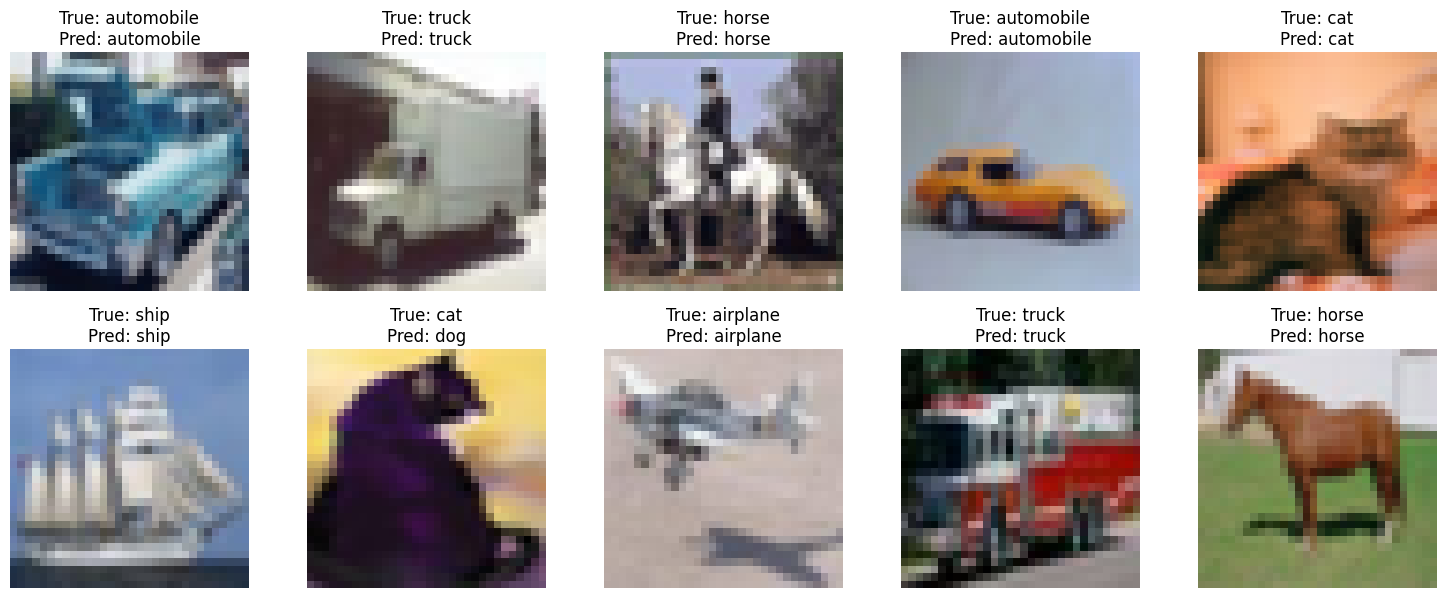

In [ ]:
plot_sample_predictions(X_test, np.argmax(true_classes, axis=1), predicted_classes, class_names, num_samples=10)

In [ ]:
model.save('complex_cnn_model.h5')


In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('complex_cnn_model.h5')


In [ ]:
loaded_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_continued = loaded_model.fit(X_train, y_train,
                              epochs=15,
                              batch_size=128,
                              validation_split=0.2)


Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - accuracy: 0.9373 - loss: 0.1782 - val_accuracy: 0.8577 - val_loss: 0.5082
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9417 - loss: 0.1633 - val_accuracy: 0.8626 - val_loss: 0.4985
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9429 - loss: 0.1584 - val_accuracy: 0.8631 - val_loss: 0.4930
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9456 - loss: 0.1503 - val_accuracy: 0.8677 - val_loss: 0.4838
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9509 - loss: 0.1391 - val_accuracy: 0.8663 - val_loss: 0.4820
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9517 - loss: 0.1360 - val_accuracy: 0.8221 - val_loss: 0.6925
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9508 - loss: 0.1401 - val_accuracy: 0.8620 - val_loss: 0.5201
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9544 - loss: 0.1302 - val_

In [ ]:
test_loss, test_acc = loaded_model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8694 - loss: 0.5022
Test accuracy: 0.8654999732971191


In [ ]:
history.history['accuracy'] += history_continued.history['accuracy']
history.history['val_accuracy'] += history_continued.history['val_accuracy']
history.history['loss'] += history_continued.history['loss']
history.history['val_loss'] += history_continued.history['val_loss']

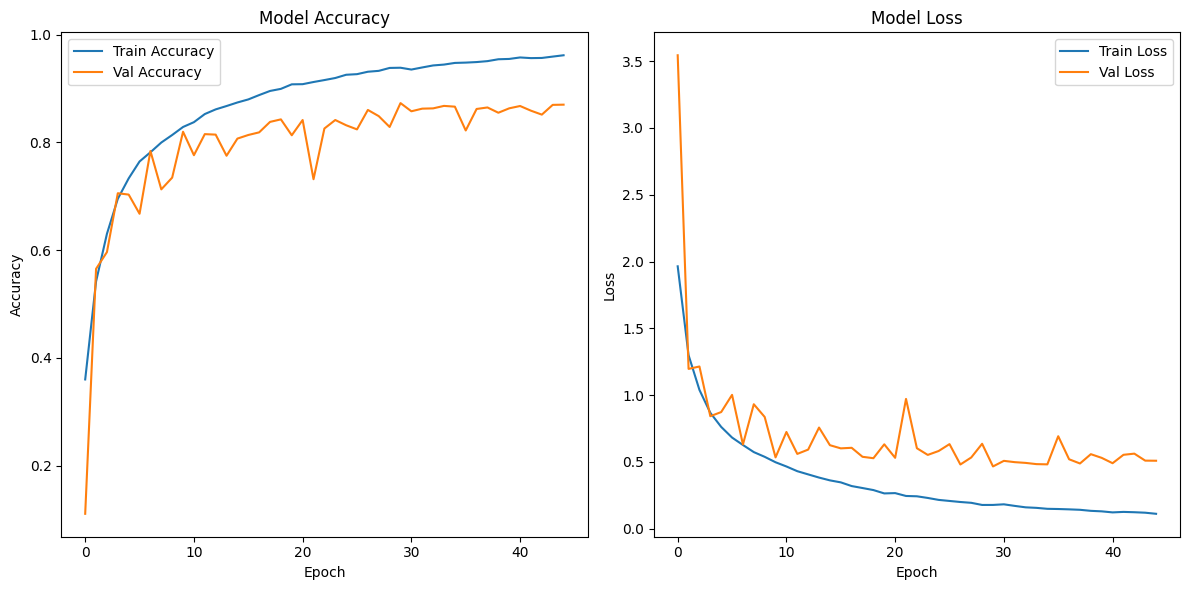

In [ ]:
plot_history(history)

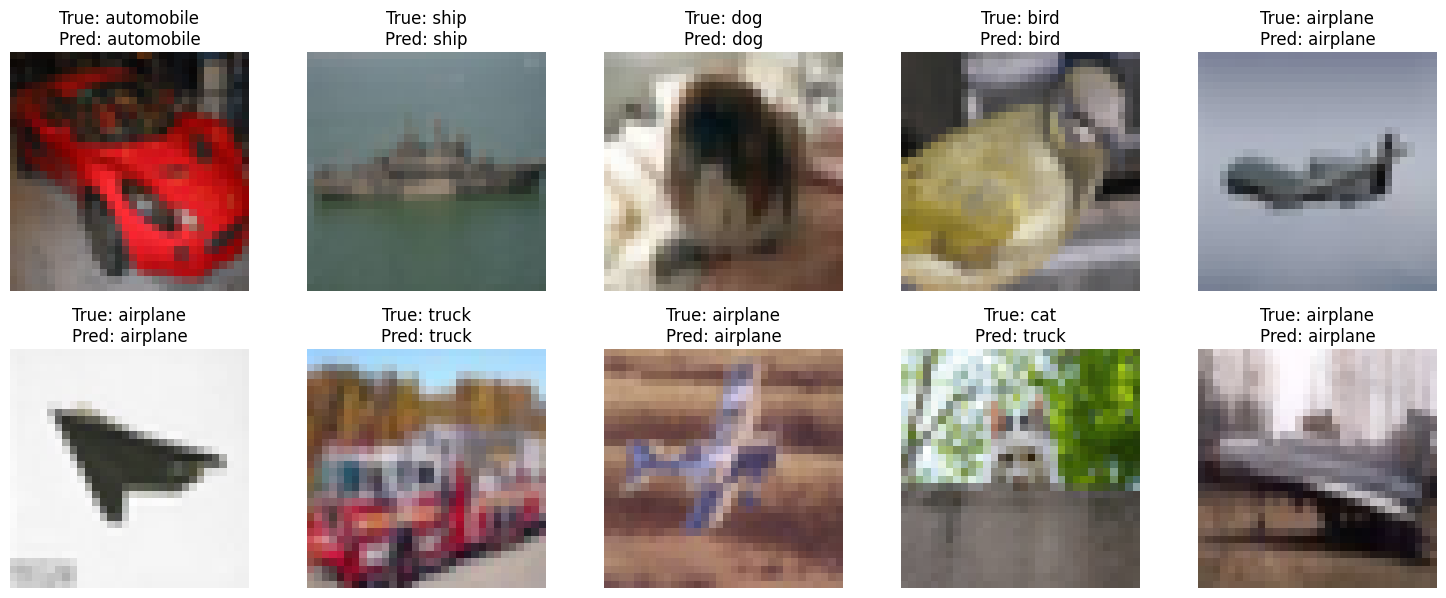

In [ ]:
plot_sample_predictions(X_test, np.argmax(true_classes, axis=1), predicted_classes, class_names, num_samples=10)

# LeNet model

In [ ]:
def create_lenet_model(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential()

    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPool2D((2, 2), strides=2))

    model.add(layers.Conv2D(16, (5, 5), activation='relu'))
    model.add(layers.MaxPool2D((2, 2), strides=2))

    model.add(layers.Conv2D(120, (5, 5), activation='relu'))

    model.add(layers.Flatten())
    model.add(layers.Dense(84, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

lenet_model = create_lenet_model()

In [ ]:
lenet_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 28, 28, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 1, 1, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
lenet_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

history_lenet = lenet_model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.2)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.2806 - loss: 1.9723 - val_accuracy: 0.4217 - val_loss: 1.5816
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4491 - loss: 1.5307 - val_accuracy: 0.4692 - val_loss: 1.4846
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4900 - loss: 1.4180 - val_accuracy: 0.5103 - val_loss: 1.3979
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5228 - loss: 1.3445 - val_accuracy: 0.5139 - val_loss: 1.3747
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5399 - loss: 1.2906 - val_accuracy: 0.5522 - val_loss: 1.2858
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5594 - loss: 1.2378 - val_accuracy: 0.5517 - val_loss: 1.2771
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5765 - loss: 1.1848 - val_accuracy: 0.5656 - val_loss: 1.2465
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5984 - loss: 1.1333 - val_accuracy: 0

In [ ]:
test_loss, test_acc = lenet_model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5914 - loss: 1.5942
Test accuracy: 0.5935999751091003


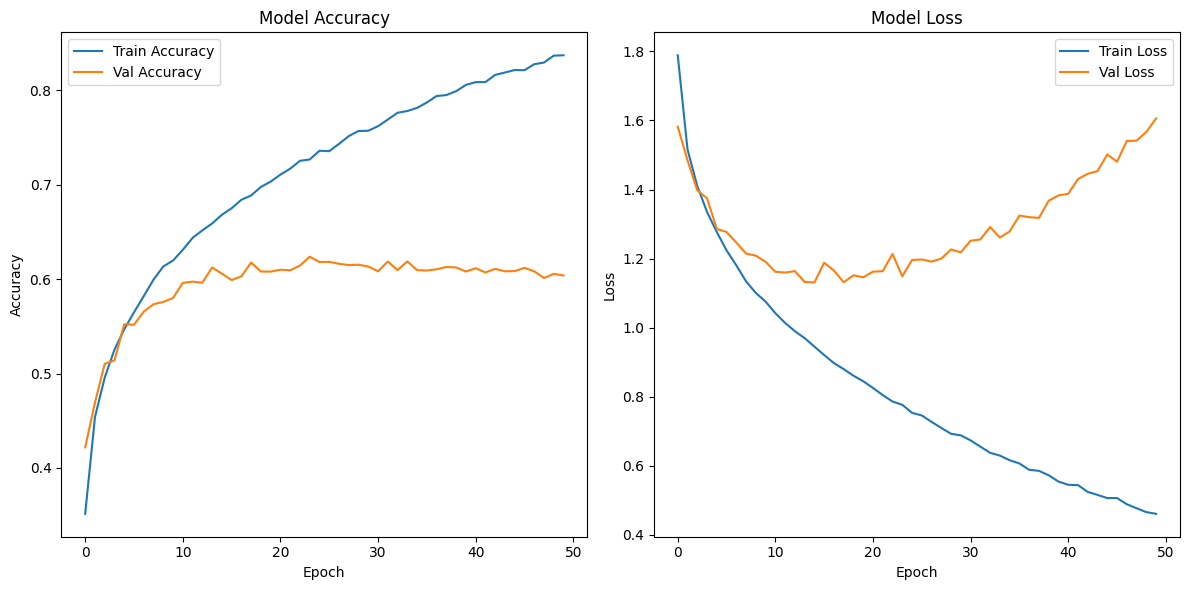

In [ ]:
plot_history(history_lenet)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


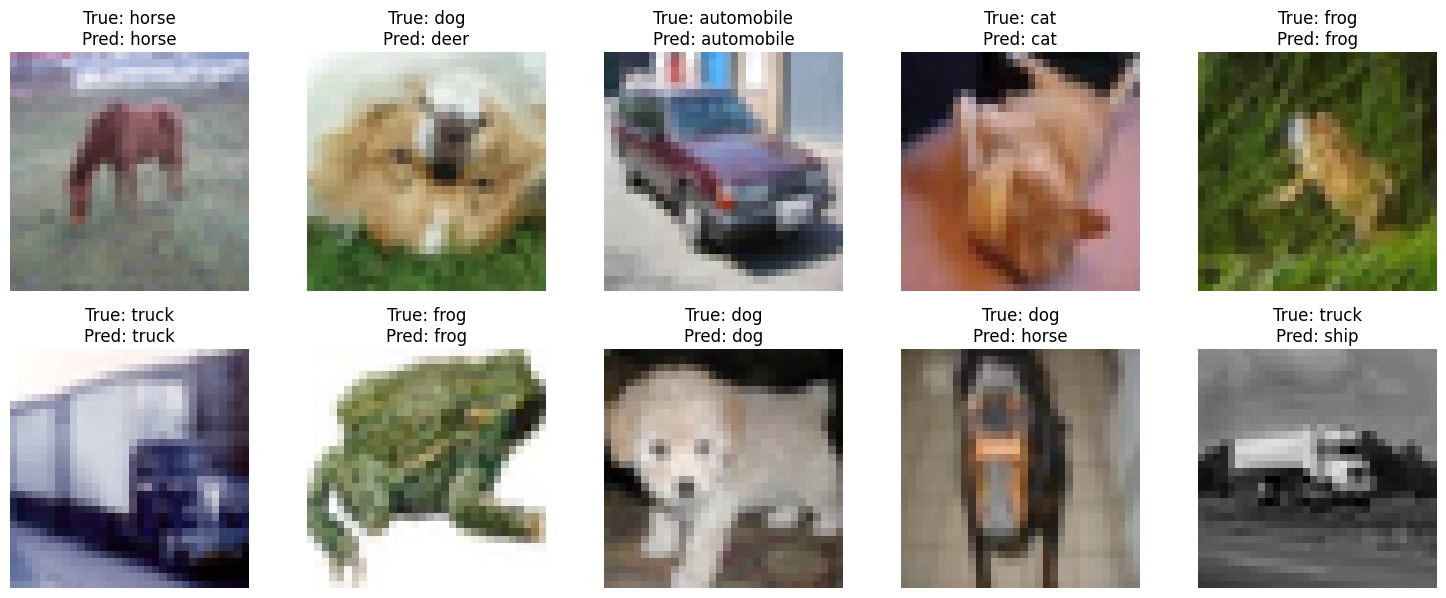

In [ ]:
predictions = lenet_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.squeeze(y_test)
plot_sample_predictions(X_test, np.argmax(true_classes, axis=1), predicted_classes, class_names, num_samples=10)